In [1]:
suppressPackageStartupMessages(library(ggraph))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(jsonlite))
suppressPackageStartupMessages(library(SingleCellExperiment)) 
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(miloR))

In [2]:
library(edgeR)
library(limma)

In [3]:
milo <- readRDS('milo_lung_heoa_countcells.rds')

In [4]:
da_res_fsc <- readRDS('miloDE/heoa_lung_FSC_dares.rds')
da_res_psc <- readRDS('miloDE/heoa_lung_PSC_dares.rds') # to plot nhood FC by cell type
da_res_fscpsc <- readRDS('miloDE/heoa_lung_FSCvsPSC_dares.rds') # to plot nhood FC by cell type


In [5]:
ftlungpb <- readRDS('miloDE/fetal_lung_primary_tissue_pseudobulks.rds')

In [6]:
ftlungpb

class: SingleCellExperiment 
dim: 3000 161 
metadata(2): level_2_in_organoid_colors pca
assays(1): X
rownames(3000): A2M-AS1 ADAMTS9-AS2 ... ZWINT ZYX
rowData names(0):
colnames(161): 0 1 ... 159 160
colData names(4): level_2 sample_id SampleName level_2_in_organoid
reducedDimNames(1): PCA
mainExpName: NULL
altExpNames(0):

In [7]:
print(dim(da_res_fsc))

[1] 10893    10


In [8]:
print(dim(da_res_psc))

[1] 10893    10


In [9]:
print(dim(da_res_fscpsc))

[1] 10893    10


In [10]:
head(da_res_fscpsc)

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,level_2,level_2_fraction,NhoodGroup
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,-0.8911699,8.786273,2.967880,0.1538094439,0.204322724,1,0.201758747,club cells,0.4054054,1
2,-2.9506592,8.595195,9.766553,0.0017772489,0.003795353,2,0.003667305,basal cells,0.4062500,2
3,0.0000000,8.643284,0.000000,1.0000000000,1.000000000,3,1.000000000,alveolar type 2 (AT2) cells,0.7142857,3
4,3.5137586,8.491094,12.132386,0.0004955765,0.001282565,4,0.001233936,alveolar type 2 (AT2) cells,1.0000000,4
5,-0.9985910,8.112321,2.276643,0.2842139186,0.362225636,5,0.357925986,alveolar type 1 (AT1) cells,0.7741935,5
6,0.0000000,8.525428,0.000000,1.0000000000,1.000000000,6,1.000000000,alveolar type 2 (AT2) cells,0.8125000,6


Converting group.by to factor...



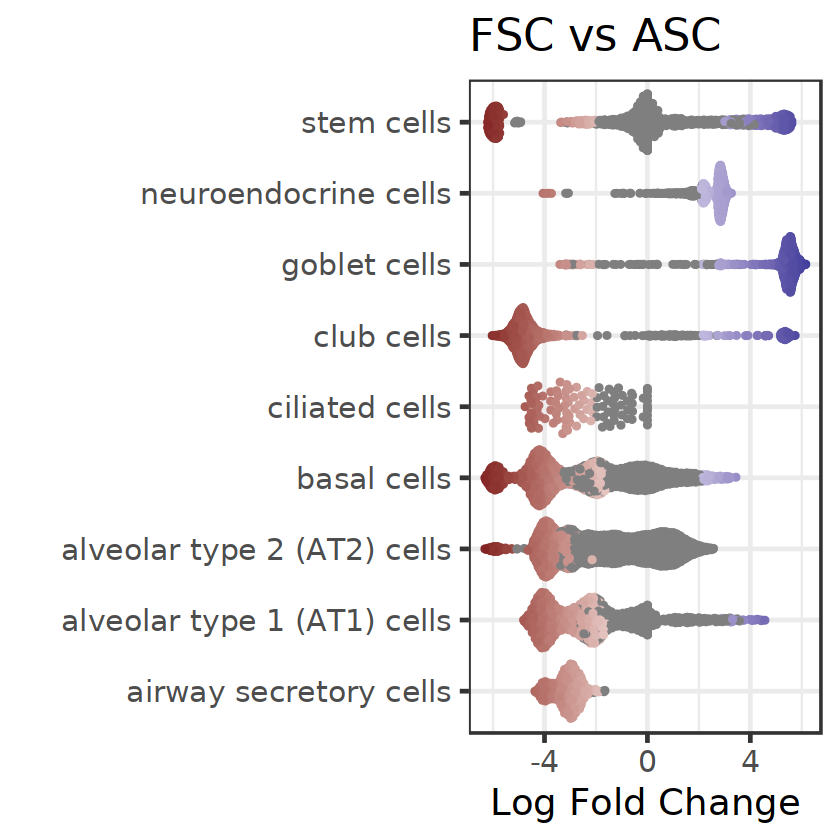

In [11]:
# FSC nhood
p1 <- plotDAbeeswarm(da_res_fsc, group.by = 'level_2', alpha = 0.01)+ xlab('')+labs(title='FSC vs ASC')
p1

In [12]:
ggsave("miloDE/DA_lung_heoa_fsc_vs_asc.pdf", p1, width=6, height=8, dpi=300)

Converting group.by to factor...



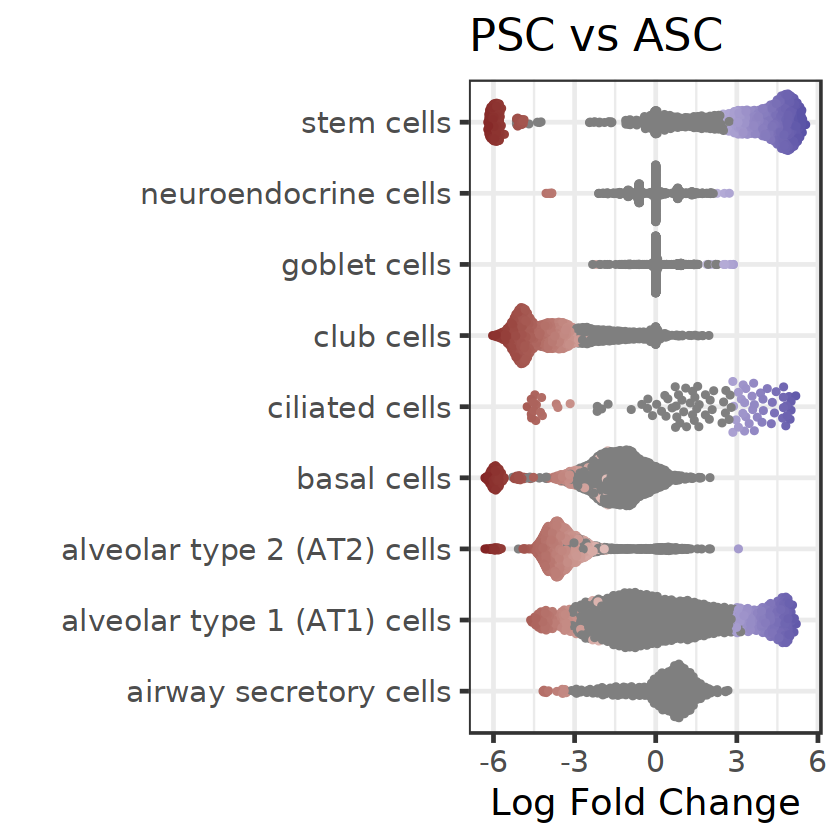

In [13]:
#PSC
p2 <- plotDAbeeswarm(da_res_psc, group.by = 'level_2', alpha = 0.01) + xlab('')+labs(title='PSC vs ASC')
p2

In [14]:
ggsave("miloDE/DA_lung_heoa_psc_vs_asc.pdf", p2, width=6, height=8, dpi=300)

Converting group.by to factor...



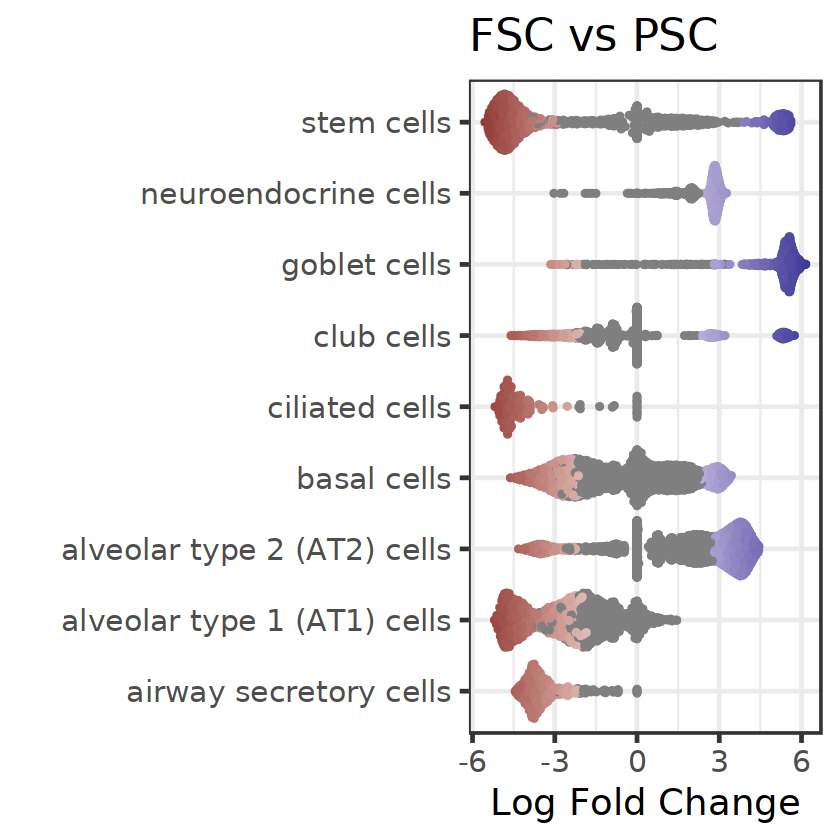

In [15]:
#FSCvsPSC
p3 <- plotDAbeeswarm(da_res_fscpsc, group.by = 'level_2', alpha = 0.01) + xlab('')+labs(title='FSC vs PSC')
p3

In [16]:
ggsave("miloDE/DA_lung_heoa_fsc_vs_psc.pdf", p3, width=6, height=8, dpi=300)

In [17]:
de_res_fsc <- readRDS('miloDE/heoa_lung_FSC_miloDE.rds') # to get sc-derive organoid gene signature
de_res_psc <- readRDS('miloDE/heoa_lung_PSC_miloDE.rds') 
de_res_fscvspsc <- readRDS('miloDE/heoa_lung_FSCvsPSC_miloDE.rds')

In [18]:
# de_res_fscvspsc[['186']]

In [19]:
log2(5)

[1] 2.321928

In [20]:
de_res_fsc <- do.call(rbind, de_res_fsc)
rownames(de_res_fsc) <- paste0('NhoodGroup',rownames(de_res_fsc))
de_res_fsc <- de_res_fsc[de_res_fsc$`adj.P.Val` < 0.05 & abs(de_res_fsc$logFC) > log2(5) ,] # & (de_res_fsc$logFC > log2(5) | de_res_fsc$logFC < -3 )

In [21]:
head(de_res_fsc)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,Nhood.Group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NhoodGroup1.MDK,2.581224,0.8859121,32.11823,3.796730e-159,2.531153e-156,352.95695,1
NhoodGroup1.S100A2,-2.656838,4.1311377,-15.29868,6.084919e-48,5.070766e-46,98.04811,1
NhoodGroup3.MDK,2.398654,0.9646666,35.05713,9.045326e-190,3.618130e-187,423.51052,3
NhoodGroup3.SLC34A2,-3.036606,2.3579312,-33.02375,6.544087e-174,1.636022e-171,387.06484,3
NhoodGroup3.CEACAM6,-2.776247,1.9998781,-28.55580,1.904302e-139,2.240356e-137,307.86796,3
NhoodGroup3.AQP1,-2.417422,1.4713094,-18.40877,2.167456e-67,6.470018e-66,142.37041,3


In [22]:
nhoodgroup_ann_fsc <- table(da_res_fsc$level_2, da_res_fsc$NhoodGroup)
nhoodgroup_ann_fsc <- apply(nhoodgroup_ann_fsc, 2, FUN=function(x) rownames(nhoodgroup_ann_fsc)[which.max(x)])
de_res_fsc$level_2 <- nhoodgroup_ann_fsc[de_res_fsc$Nhood.Group]

In [23]:
summary(de_res_fsc$logFC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5.7912 -2.7803 -2.3616 -0.2062  2.6484  6.4891 

In [24]:
print(dim(de_res_fsc))
head(de_res_fsc)

[1] 1031    8


,logFC,AveExpr,t,P.Value,adj.P.Val,B,Nhood.Group,level_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NhoodGroup1.MDK,2.581224,0.8859121,32.11823,3.796730e-159,2.531153e-156,352.95695,1,club cells
NhoodGroup1.S100A2,-2.656838,4.1311377,-15.29868,6.084919e-48,5.070766e-46,98.04811,1,club cells
NhoodGroup3.MDK,2.398654,0.9646666,35.05713,9.045326e-190,3.618130e-187,423.51052,3,alveolar type 2 (AT2) cells
NhoodGroup3.SLC34A2,-3.036606,2.3579312,-33.02375,6.544087e-174,1.636022e-171,387.06484,3,alveolar type 2 (AT2) cells
NhoodGroup3.CEACAM6,-2.776247,1.9998781,-28.55580,1.904302e-139,2.240356e-137,307.86796,3,alveolar type 2 (AT2) cells
NhoodGroup3.AQP1,-2.417422,1.4713094,-18.40877,2.167456e-67,6.470018e-66,142.37041,3,alveolar type 2 (AT2) cells


In [25]:
write.csv(de_res_fsc, file='miloDE/DEG_fsc_byNhoodGroup.csv', row.names=TRUE, quote=FALSE)

In [26]:
de_res_psc <- do.call(rbind, de_res_psc)
rownames(de_res_psc) <- paste0('NhoodGroup',rownames(de_res_psc))
de_res_psc <- de_res_psc[de_res_psc$`adj.P.Val` < 0.05 & abs(de_res_psc$logFC) > log2(5) ,] # & (de_res_psc$logFC > log2(5)| de_res_psc$logFC < -3)

In [27]:
nhoodgroup_ann_psc <- table(da_res_psc$level_2, da_res_psc$NhoodGroup)
nhoodgroup_ann_psc <- apply(nhoodgroup_ann_psc, 2, FUN=function(x) rownames(nhoodgroup_ann_psc)[which.max(x)])
de_res_psc$level_2 <- nhoodgroup_ann_psc[de_res_psc$Nhood.Group]

In [28]:
print(dim(de_res_psc))
head(de_res_psc)

[1] 1025    8


,logFC,AveExpr,t,P.Value,adj.P.Val,B,Nhood.Group,level_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NhoodGroup1.MDK,2.573165,0.8778622,32.70852,8.174734e-166,5.449823e-163,368.25363,1,club cells
NhoodGroup1.S100A2,-2.633886,4.1045166,-15.34028,2.097304e-48,1.553559e-46,99.09494,1,club cells
NhoodGroup3.MDK,2.398654,0.9646666,35.05713,9.045326e-190,3.618130e-187,423.51052,3,alveolar type 2 (AT2) cells
NhoodGroup3.SLC34A2,-3.036606,2.3579312,-33.02375,6.544087e-174,1.636022e-171,387.06484,3,alveolar type 2 (AT2) cells
NhoodGroup3.CEACAM6,-2.776247,1.9998781,-28.55580,1.904302e-139,2.240356e-137,307.86796,3,alveolar type 2 (AT2) cells
NhoodGroup3.AQP1,-2.417422,1.4713094,-18.40877,2.167456e-67,6.470018e-66,142.37041,3,alveolar type 2 (AT2) cells


In [29]:
sum(table(de_res_fsc$Nhood.Group) > 10) # signatures with larger than 10 genes in each nhood group

[1] 31

In [30]:
# table(de_res_fsc$Nhood.Group)[table(de_res_fsc$Nhood.Group) > 10]

In [31]:
# signatures in DE genes with more than 5 fold change up-regulated in a nhood group with minimal signature length of 15

keep <- names(table(de_res_fsc$Nhood.Group)[table(de_res_fsc$Nhood.Group) > 15])
fsc_sig <- de_res_fsc[de_res_fsc$Nhood.Group %in% keep, ]
fsc_sig$Symbol <- gsub('NhoodGroup[0-9]+\\.','', rownames(fsc_sig))
fsc_sig <- split(fsc_sig$Symbol, fsc_sig$Nhood.Group)
names(fsc_sig) <- paste0('fsc_NhoodGroup_',names(fsc_sig))

In [32]:
sum(table(de_res_psc$Nhood.Group) > 15)

[1] 17

In [33]:
table(de_res_psc$Nhood.Group)[table(de_res_psc$Nhood.Group) > 10]


102 107  11 120 129 131 132 135 136  14 147 157 163 166  17 183 186 206 209  22 
 18  11  20  22  23  15  13  15  15  22  14  33  32  11  11  15  15  18  20  12 
228 235 241 253  26  32  33  38  41  75   8  80 
 18  12  19  19  16  13  36  15  19  18  25  12 

In [34]:
keep <- names(table(de_res_psc$Nhood.Group)[table(de_res_psc$Nhood.Group) > 15])
psc_sig <- de_res_psc[de_res_psc$Nhood.Group %in% keep, ]
psc_sig$Symbol <- gsub('NhoodGroup[0-9]+\\.','', rownames(psc_sig))
psc_sig <- split(psc_sig$Symbol, psc_sig$Nhood.Group)
names(psc_sig) <- paste0('psc_NhoodGroup_',names(psc_sig))

# psc_sig

In [35]:
write.csv(de_res_psc, file='miloDE/DEG_psc_byNhoodGroup.csv', row.names=TRUE, quote=FALSE)

In [36]:
de_res_fscvspsc <- do.call(rbind, de_res_fscvspsc)
rownames(de_res_fscvspsc) <- paste0('NhoodGroup',rownames(de_res_fscvspsc))
de_res_fscvspsc <- de_res_fscvspsc[de_res_fscvspsc$`adj.P.Val` < 0.05 & abs(de_res_fscvspsc$logFC) > log2(5) ,] # & (de_res_fscvspsc$logFC > log2(5)| de_res_fscvspsc$logFC < -3)

In [37]:
nhoodgroup_ann_fscpsc <- table(da_res_fscpsc$level_2, da_res_fscpsc$NhoodGroup)

In [38]:
nhoodgroup_ann_fscpsc <- apply(nhoodgroup_ann_fscpsc, 2, FUN=function(x) rownames(nhoodgroup_ann_fscpsc)[which.max(x)])
de_res_fscvspsc$level_2 <- nhoodgroup_ann_fscpsc[de_res_fscvspsc$Nhood.Group]

In [39]:
print(dim(de_res_fscvspsc))
head(de_res_fscvspsc)

[1] 1481    8


,logFC,AveExpr,t,P.Value,adj.P.Val,B,Nhood.Group,level_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NhoodGroup3.STARD4-AS1,2.366508,0.07538092,12.559068,3.229239e-34,5.871343e-32,66.670324,3,alveolar type 2 (AT2) cells
NhoodGroup3.FTL,-4.012594,4.33851858,-8.050026,1.861882e-15,1.959876e-13,23.954366,3,alveolar type 2 (AT2) cells
NhoodGroup3.COL8A1,2.358873,0.20675537,7.812239,1.156115e-14,1.101062e-12,22.159189,3,alveolar type 2 (AT2) cells
NhoodGroup3.FTH1,-3.674484,3.83614780,-7.687479,2.956124e-14,2.687385e-12,21.236892,3,alveolar type 2 (AT2) cells
NhoodGroup3.MDK,-2.667345,0.96466656,-4.722111,2.588668e-06,1.015164e-04,3.428879,3,alveolar type 2 (AT2) cells
NhoodGroup3.AGR2,-3.283166,2.21474960,-4.629246,4.039648e-06,1.524395e-04,3.002619,3,alveolar type 2 (AT2) cells


In [40]:
write.csv(de_res_fscvspsc, file='miloDE/DEG_fscvspsc_byNhoodGroup.csv', row.names=TRUE, quote=FALSE)

In [41]:
sum(table(de_res_fscvspsc$Nhood.Group) > 15)

[1] 45

In [42]:
table(de_res_fscvspsc$Nhood.Group)[table(de_res_fscvspsc$Nhood.Group) > 15]


100 101 107 108 123 130 133  14 140 146 155 158 162 171 175 182 183 198 206 218 
 17  22  19  24  18  23  16  32  18  22  27  18  39  19  16  28  32  22  26  20 
 22 232  24  26  32  33  36  40  46  52  53  54  62  67  68  70  74  75   8  88 
 23  18  19  21  16  45  17  19  26  19  19  18  21  17  17  20  21  20  26  27 
 89  90  95  96  97 
 22  17  22  17  23 

In [43]:
keep <- names(table(de_res_fscvspsc$Nhood.Group)[table(de_res_fscvspsc$Nhood.Group) > 15])
pscfsc_sig <- de_res_fscvspsc[de_res_fscvspsc$Nhood.Group %in% keep, ]
pscfsc_sig$Symbol <- gsub('NhoodGroup[0-9]+\\.','', rownames(pscfsc_sig))
pscfsc_sig <- split(pscfsc_sig$Symbol, pscfsc_sig$Nhood.Group)
names(pscfsc_sig) <- paste0('pscfsc_NhoodGroup_',names(pscfsc_sig))
pscfsc_sig

$pscfsc_NhoodGroup_100
 [1] "CHAC1"     "FEZ1"      "SNHG12"    "TXNIP"     "DDIT3"     "KLF10"    
 [7] "SQSTM1"    "LGALS3"    "SLC3A2"    "TNFRSF12A" "GDF15"     "DDIT4"    
[13] "PPP1R15A"  "AREG"      "GADD45A"   "ATF3"      "TUBA1B"   

$pscfsc_NhoodGroup_101
 [1] "COL6A3"  "FTL"     "FTH1"    "TESC"    "S100A6"  "KRT8"    "SPINK1" 
 [8] "AGR2"    "B2M"     "TFF1"    "MDK"     "CLDN4"   "APOE"    "CTSH"   
[15] "WFDC2"   "PGK1"    "HES1"    "RNASE1"  "PEG10"   "SCGB3A2" "FABP5"  
[22] "PGC"    

$pscfsc_NhoodGroup_107
 [1] "CLCA1"  "FABP1"  "GUCA2A" "MUC2"   "PHGR1"  "FCGBP"  "LGALS4" "LYZ"   
 [9] "JUND"   "JUNB"   "CKB"    "TESC"   "CLDN18" "TFF2"   "TFF1"   "PRSS2" 
[17] "LY6E"   "TFF3"   "IFITM3"

$pscfsc_NhoodGroup_108
 [1] "B2M"      "CLDN18"   "CTSE"     "GDF15"    "GPX2"     "HLA-B"   
 [7] "IFI6"     "IFI27"    "IFIT1"    "ISG15"    "LY6E"     "LYZ"     
[13] "MX1"      "OAS1"     "PRSS2"    "S100A2"   "SERPINA1" "SFN"     
[19] "STMN1"    "TFF1"     "IFITM3"   "TACSTD2"  "TUBA1B"   "KRT6A"   

$pscfsc_NhoodGroup_123
 [1] "CLCA1"  "FABP1"  "MUC2"   "ZG16"   "GUCA2A" "LCN15"  "FCGBP"  "PHGR1" 
 [9] "LYZ"    "IGFBP2" "TFF1"   "LGALS4" "TFF2"   "WFDC2"  "CTSE"   "CLDN18"
[17] "TESC"   "SAT1"  

$pscfsc_NhoodGroup_130
 [1] "COL11A1"  "COL3A1"   "COL1A1"   "VCAN"     "S100A6"   "CCND2"   
 [7] "NEUROD1"  "KCNQ1OT1" "CELA3A"   "VIM"      "FN1"      "LYZ"     
[13] "FLNA"     "SPINK1"   "NEAT1"    "CELA3B"   "LY6E"     "HSPB1"   
[19] "CD24"     "HES6"     "SPON2"    "PRSS2"    "TFF2"    

$pscfsc_NhoodGroup_133
 [1] "WNT5A"  "LUM"    "COL3A1" "COL6A2" "COL1A2" "MSX1"   "DCN"    "COL1A1"
 [9] "LGALS1" "VIM"    "FOS"    "S100A6" "LYZ"    "CHGA"   "TAC3"   "PRSS2" 

$pscfsc_NhoodGroup_14
 [1] "COL1A1"  "COL1A2"  "COL3A1"  "COL6A2"  "LUM"     "MSX1"    "PRRX1"  
 [8] "TBX3"    "WNT5A"   "FRMD6"   "CCN1"    "VIM"     "ZFP36L1" "IGFBP3" 
[15] "COL6A3"  "COL6A1"  "FOS"     "PRSS23"  "EGR1"    "IER2"    "S100A6" 
[22] "HES6"    "IGFBP5"  "RBP1"    "LYZ"     "SEC11C"  "CHGA"    "SPINK1" 
[29] "CELA3A"  "PRSS2"   "TFF3"    "TFF2"   

$pscfsc_NhoodGroup_140
 [1] "CLDN18"   "CTSE"     "MX1"      "SERPINA1" "LYZ"      "IFI6"    
 [7] "OAS1"     "IFI27"    "TFF1"     "ISG15"    "PRSS2"    "LY6E"    
[13] "GPX2"     "CSTA"     "SFN"      "WFDC2"    "KRT6A"    "S100A2"  

$pscfsc_NhoodGroup_146
 [1] "COL6A3"  "TFF2"    "TFF1"    "SPINK1"  "ADH1C"   "FTH1"    "IFRD1"  
 [8] "B2M"     "PRSS2"   "FTL"     "TESC"    "KRT19"   "KRT18"   "SLC6A14"
[15] "AGR2"    "MDK"     "SYNE1"   "RNASE1"  "TPM1"    "MGST1"   "LMO7"   
[22] "IER2"   

$pscfsc_NhoodGroup_155
 [1] "ID3"      "COL3A1"   "WNT5A"    "COL1A2"   "FSTL1"    "LUM"     
 [7] "DCN"      "CXCL12"   "COL1A1"   "COL6A2"   "MSX1"     "FRMD6"   
[13] "ID1"      "APCDD1"   "IGFBP3"   "LGALS1"   "VIM"      "FOS"     
[19] "CCN1"     "COL6A3"   "IER2"     "EGR1"     "COL6A1"   "HEPACAM2"
[25] "CHGA"     "LYZ"      "TAC3"    

$pscfsc_NhoodGroup_158
 [1] "CTSE"     "CLDN18"   "LYZ"      "MX1"      "TFF1"     "PRSS2"   
 [7] "IFI6"     "ISG15"    "SERPINA1" "IFI27"    "S100A2"   "LY6E"    
[13] "SFN"      "GPX2"     "HLA-B"    "IFITM3"   "KRT6A"    "TACSTD2" 

$pscfsc_NhoodGroup_162
 [1] "PTPRZ1"  "EGR3"    "FUT9"    "CASC19"  "FSIP2"   "ADAMTS6" "SULT1C2"
 [8] "COL27A1" "RND1"    "LIF"     "GBP2"    "VCAN"    "ISG15"   "LRRC75A"
[15] "RCAN1"   "TESC"    "ID4"     "KRT8"    "ENC1"    "MXD1"    "VMP1"   
[22] "S100A6"  "ANXA2"   "CAPN8"   "CCND2"   "HMGCS1"  "MVD"     "KRT19"  
[29] "KLF6"    "SYNE1"   "HES1"    "NEDD9"   "ELF3"    "JUN"     "FDPS"   
[36] "ANXA1"   "THBS1"   "JUND"    "CTSH"   

$pscfsc_NhoodGroup_171
 [1] "GPX2"     "SERPINA1" "S100A2"   "LYZ"      "CLDN18"   "IFI6"    
 [7] "ISG15"    "MX1"      "B2M"      "S100A6"   "SFN"      "IFITM3"  
[13] "TFF1"     "LY6E"     "TACSTD2"  "PRSS2"    "HLA-B"    "IFI27"   
[19] "TFF2"    

$pscfsc_NhoodGroup_175
 [1] "SERPINA1" "IFI6"     "MX1"      "CTSE"     "GPX2"     "ISG15"   
 [7] "OAS1"     "LY6E"     "CLDN18"   "S100A2"   "HLA-B"

In [44]:
head(colData(ftlungpb))

DataFrame with 6 rows and 4 columns
   level_2 sample_id             SampleName         level_2_in_organoid
  <factor>  <factor>            <character>                    <factor>
0      AT1 HDBR14804 level_2.AT1-sample_i.. alveolar type 1 (AT1) cells
1      AT1 HDBR14854 level_2.AT1-sample_i.. alveolar type 1 (AT1) cells
2      AT1 HDBR15167 level_2.AT1-sample_i.. alveolar type 1 (AT1) cells
3      AT1 HDBR15168 level_2.AT1-sample_i.. alveolar type 1 (AT1) cells
4      AT1 HDBR15219 level_2.AT1-sample_i.. alveolar type 1 (AT1) cells
5      AT1 HDBR15233 level_2.AT1-sample_i.. alveolar type 1 (AT1) cells

In [45]:
head(assay(ftlungpb, 'X')[,1:10])

,0,1,2,3,4,5,6,7,8,9
A2M-AS1,0,0.0000000,0.0000000,0.004359668,0.0000000,0.0000000,0,0.000000,0,0.0000000
ADAMTS9-AS2,0,0.2953761,0.2143233,0.052106373,0.1171245,0.0000000,0,0.000000,0,0.1519912
AQP4-AS1,0,0.0000000,0.0000000,0.001064921,0.0000000,0.0000000,0,0.000000,0,0.0000000
ASMTL-AS1,0,0.0000000,0.0000000,0.003804805,0.0000000,0.0000000,0,0.000000,0,0.0000000
CAHM,0,0.0000000,0.2828345,0.065442212,0.0000000,0.1850073,0,2.309182,0,0.0906659
CASC2,0,0.0000000,0.0000000,0.028980568,0.0000000,0.0000000,0,0.000000,0,0.0303791


In [46]:
all_sigs <- c(pscfsc_sig, fsc_sig, psc_sig)

In [47]:
tail(names(all_sigs))

[1] "psc_NhoodGroup_253" "psc_NhoodGroup_26"  "psc_NhoodGroup_33" 
[4] "psc_NhoodGroup_41"  "psc_NhoodGroup_75"  "psc_NhoodGroup_8"

In [48]:
ftlungpb

class: SingleCellExperiment 
dim: 3000 161 
metadata(2): level_2_in_organoid_colors pca
assays(1): X
rownames(3000): A2M-AS1 ADAMTS9-AS2 ... ZWINT ZYX
rowData names(0):
colnames(161): 0 1 ... 159 160
colData names(4): level_2 sample_id SampleName level_2_in_organoid
reducedDimNames(1): PCA
mainExpName: NULL
altExpNames(0):

In [49]:
dim(assay(ftlungpb, 'X'))

[1] 3000  161

In [ ]:
## make a SINGLE plot of DE results


In [ ]:
groups <- levels(ftlungpb$level_2_in_organoid)
fry_res <- list()
for (group in groups){
    cat(group)
    condition <- factor(ifelse(ftlungpb$level_2_in_organoid==group, group, 'other'))
    condition <- relevel(condition, ref = 'other')
    print(table(is.na(condition)))
    y <- assay(ftlungpb, 'X')
    colnames(y) <- ftlungpb$SampleName
    
    y <- y[,!is.na(condition)]
    condition <- condition[!is.na(condition)]
    d <- model.matrix(~condition)
    print(dim(d))
   
    print(dim(y))
    idx <- ids2indices(all_sigs, rownames(y))
    
    res <- fry(y, index=idx, design = d, contrast = 2)
    res$condition = group
    fry_res[[group]] <- res
}

In [ ]:
names(fry_res)

In [ ]:
sapply(names(fry_res), FUN=function(x) table(fry_res[[x]]['FDR'] < 0.05))

In [ ]:
head(fry_res[['stem cells']])

In [ ]:
fry_res <- do.call(rbind, fry_res)

In [ ]:
fry_res$pathway <- gsub('(.*)\\.(.*)','\\2',rownames(fry_res))
# fry_res$pathway <- rownames(fry_res)

In [ ]:
head(fry_res)

In [ ]:
library(ggplot2)

ggplot(fry_res, aes(y=pathway, x = condition)) +
    geom_point(aes(size = -log10(FDR), color = Direction)) +  
    scale_color_manual(values = c('Up'= 'red', 'Down' = 'blue')) +
#     geom_text(aes(label = signif), size = 1.9, color = 'black') + 
    theme_bw() + 
    coord_flip() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position="top", panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    xlab('Cell types') + ylab('Pathways') + labs(fill = expression(-log[10]~FDR))

In [ ]:
ggsave("miloDE/heatmap_signatures.png", units="in", width=10, height=6, dpi=300)

In [ ]:
sessionInfo()